# **Import Library**

---



In [ ]:
!apt-get update -y
!apt-get install python3.10

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 384 kB in 1s (346 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pac

In [ ]:
!python --version

Python 3.10.12


In [ ]:
!pip install TensorFlow==2.15.0
!pip install tensorflow-decision-forests==1.8.1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

# **Connect to drive**

---


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **Check Number of Images**

In [ ]:
os.listdir('/content/drive/MyDrive/db/jenis-hewan')

#number of images of each classes in the train folder
# Menghitung dan mencetak jumlah gambar untuk setiap jenis hewan
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/train/Bekantan'))} train set images of Bekantan.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/train/Kakatua Jambul Kuning'))} train set images of Kakatua Jambul Kuning.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/train/Komodo'))} train set images of Komodo.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/train/Whale Shark'))} train set images of Whale Shark.")
print()

#now return the list of the content in that val folder
# Menghitung dan mencetak jumlah gambar untuk setiap jenis hewan di folder val
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/val/Bekantan'))} train set images of Bekantan.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/val/Kakatua Jambul Kuning'))} train set images of Kakatua Jambul Kuning.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/val/Komodo'))} train set images of Komodo.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/val/Whale Shark'))} train set images of Whale Shark.")
print()

#now return the list of the content in that test folder
# Menghitung dan mencetak jumlah gambar untuk setiap jenis hewan di folder test
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/test/Bekantan'))} train set images of Bekantan.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/test/Kakatua Jambul Kuning'))} train set images of Kakatua Jambul Kuning.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/test/Komodo'))} train set images of Komodo.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/db/jenis-hewan/test/Whale Shark'))} train set images of Whale Shark.")
print()

There are 24 train set images of Bekantan.
There are 40 train set images of Kakatua Jambul Kuning.
There are 40 train set images of Komodo.
There are 40 train set images of Whale Shark.

There are 43 train set images of Bekantan.
There are 25 train set images of Kakatua Jambul Kuning.
There are 35 train set images of Komodo.
There are 28 train set images of Whale Shark.

There are 33 train set images of Bekantan.
There are 24 train set images of Kakatua Jambul Kuning.
There are 32 train set images of Komodo.
There are 32 train set images of Whale Shark.



# **Path Declaration**

---



In [ ]:
TRAINING_DIR = "/content/drive/MyDrive/db/jenis-hewan/train"
VALIDATION_DIR = "/content/drive/MyDrive/db/jenis-hewan/val"
TESTING_DIR = "/content/drive/MyDrive/db/jenis-hewan/test"


# **Generator**

---



In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # train
  train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                     fill_mode='nearest',
                                     rotation_range=80,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.3,
                                     horizontal_flip=True
                                     )
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(224, 224))

  # val
  validation_datagen =ImageDataGenerator(rescale = 1.0/255. )
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(224, 224))

  return train_generator, validation_generator

In [ ]:
# Test generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 143 images belonging to 4 classes.
Found 129 images belonging to 4 classes.


# **Show Images Sample**

---



In [ ]:
def show_image_samples(gen):
  train_dict = train_generator.class_indices
  classes = list(train_dict.keys())
  images, labels = next(gen) #get a sample batch from generator
  plt.figure(figsize=(20,20))
  length = len(labels)
  if length < 10:
    r = length
  else:
    r = 12
  for i in range(r):
    plt.subplot(6, 6, i+1)
    image = images[i]
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='black', fontsize=18)
    plt.axis('off')
  plt.show()



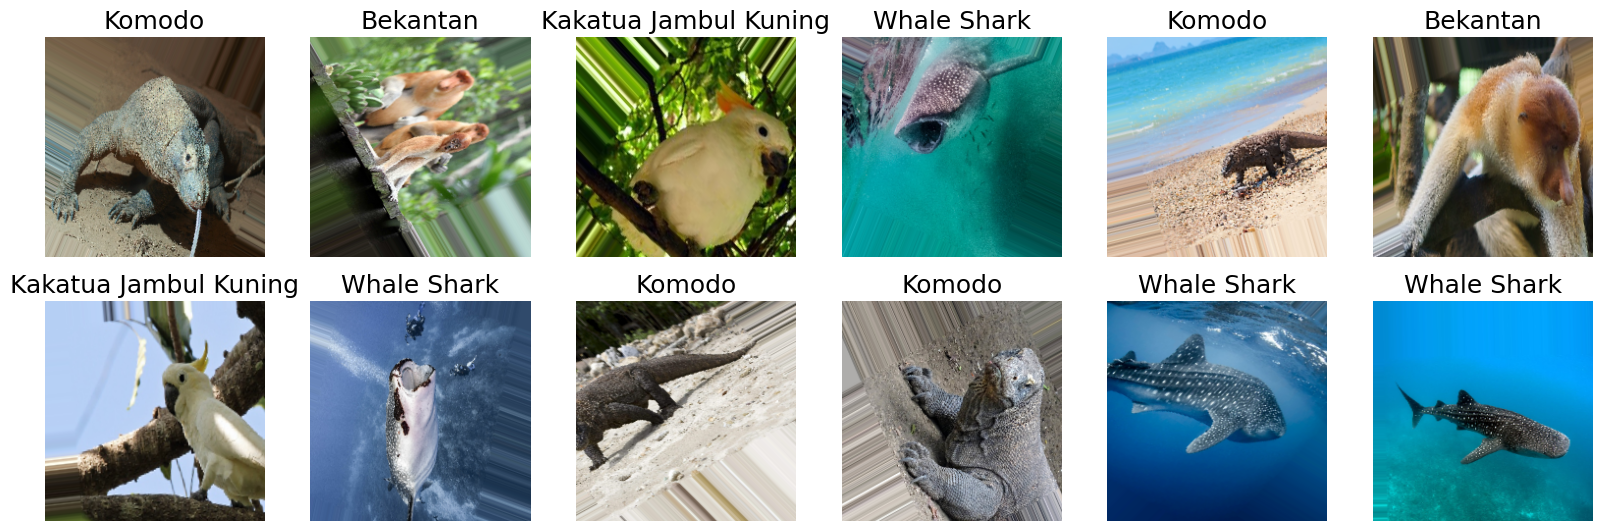

In [ ]:
show_image_samples(train_generator)

# **Create MODEL**

---



In [ ]:
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape = (224, 224, 3),
                                                            include_top = False,
                                                            weights = "imagenet")

In [ ]:
base_model.trainable = False

#Transfer Learning 1


In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])



In [ ]:
# Mendefenisikan fungsi Callback
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Model Checkpoint
checkpoint_path = 'model_checkpoints/Hewan.weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True, # Changed save_weight_only to save_weights_only
    verbose=2
)

In [ ]:
# Change the number of neurons in the output layer to 4
outputs = tf.keras.layers.Dense(4, activation="softmax")(x)

# Redefine the model with the updated output layer
model = tf.keras.Model(inputs, outputs)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# **Grafik Accuracy & Loss**

---



In [ ]:
# Train the model and store the training history
history = model.fit(
    train_generator,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    callbacks=[checkpoint]  # Include the checkpoint callback if defined
)

# training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# loss plot
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.show()
print()

# accuracy plot
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [ ]:
TEST_DIR = TESTING_DIR
test_datagen = ImageDataGenerator(rescale = 1.0 / 255. )

# pass in the appropriate arguments to the flow_from_directory method
test_set_2 = test_datagen.flow_from_directory(directory=TEST_DIR,
                                                      batch_size=16,
                                                      class_mode='categorical',
                                                      target_size=(224, 224))

Found 118 images belonging to 4 classes.


In [ ]:
Y_pred_2 = model.predict(test_set_2)
y_pred_2 = np.argmax(Y_pred_2, axis=1)

8/8 [==============================] - 5s 434ms/step


In [ ]:
print(classification_report(test_set_2.classes, y_pred_2))

              precision    recall  f1-score   support

           0       0.26      0.25      0.25        32
           1       0.29      0.29      0.29        24
           2       0.26      0.27      0.26        30
           3       0.31      0.31      0.31        32

    accuracy                           0.28       118
   macro avg       0.28      0.28      0.28       118
weighted avg       0.28      0.28      0.28       118



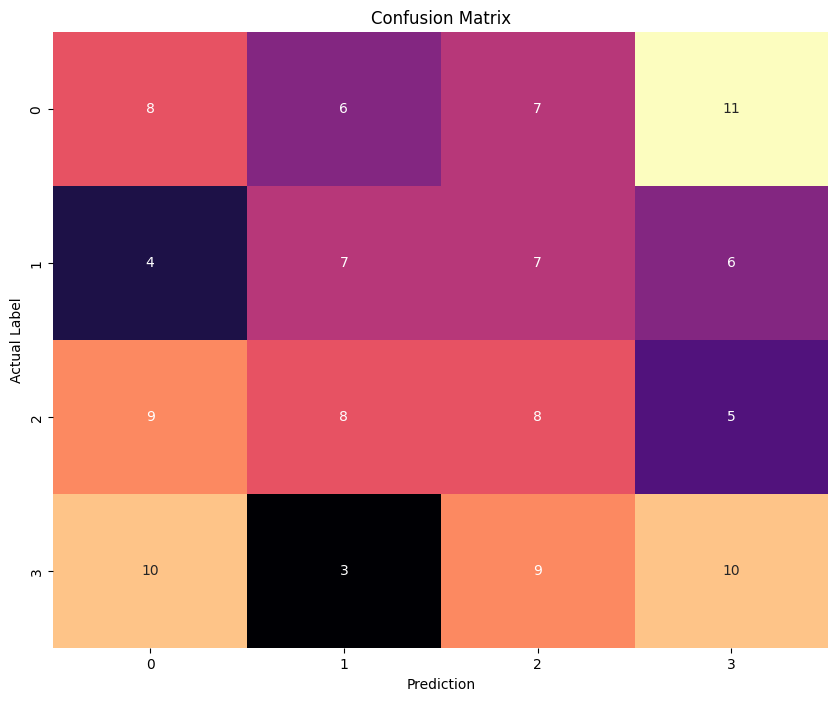

In [ ]:

y_true = test_set_2.classes  # actual label
y_pred = y_pred_2  # prediction label

# confusion matrix
cm = confusion_matrix(y_true, y_pred)

# confusion matrix heatmap
class_names = ['0', '1', '2', '3']
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prediction')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def predict_image(image_upload, model = model):
  im = image_upload
  im_array = np.asarray(im)
  im_array = im_array*(1.0/225.0)
  im_input = tf.reshape(im_array, shape = [1, 224, 224, 3])

  predict_array = model.predict(im_input)[0]

  import pandas as pd
  df = pd.DataFrame(predict_array)
  df = df.rename({0:'Probability'}, axis = 'columns')
  prod = ['Bekantan', 'Kakatua Jambul Kuning', 'Komodo', 'Whale Shark']
  df['motif'] = prod
  df = df[['motif', 'Probability']]

  predict_label = np.argmax(model.predict(im_input))

  if predict_label == 0:
      predict_product = 'Bekantan'
  elif predict_label == 1:
      predict_product = 'Kakatua Jambul Kuning'
  elif predict_label == 2:
      predict_product = 'Komodo'
  elif predict_label == 3:
      predict_product = 'Whale Shark'
  return predict_product, df

Saving Image_8.jpg to Image_8 (1).jpg
1/1 [==============================] - 0s 24ms/step




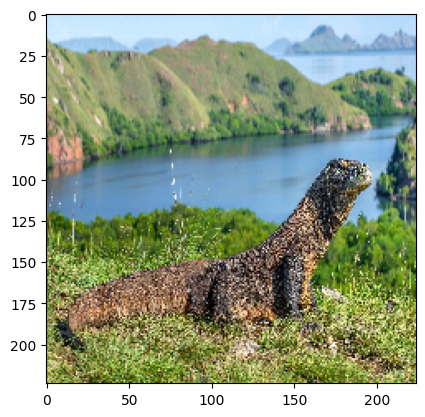


The image is detected as Komodo


                   motif   Probability
0               Bekantan  2.922737e-06
1  Kakatua Jambul Kuning  7.206153e-07
2                 Komodo  9.999948e-01
3            Whale Shark  1.576402e-06




In [ ]:
from keras.preprocessing import image
from google.colab import files


uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = tf.keras.preprocessing.image.load_img(path, target_size=(224, 224))
  imgplot = plt.imshow(img)
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  img = np.vstack([x])

label, df = predict_image(img)

print('\n')
plt.show()
print("\nThe image is detected as " + label)
print('\n')
print(df)
print('\n')

In [ ]:
#Save model to h5 format

model.save("Hewan-Model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

from keras.models import model_from_json

#Save model to JSON format
model_json = model.to_json()
with open("ModelHewan.json", "w") as json_file:
    json_file.write(model_json)


In [ ]:
!sudo pip3 install tensorflowjs

In [ ]:
!sudo tensorflowjs_converter

2024-12-09 07:38:59.618354: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-09 07:38:59.618405: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-09 07:38:59.619686: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-09 07:38:59.626982: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-09 07:39:00.635595: W tensorflow/compiler/tf2

In [ ]:
!tensorflowjs_converter --input_format=keras '/content/Hewan-Model.h5' "/content/drive/MyDrive/json"

2024-12-09 07:39:04.316027: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-09 07:39:04.316085: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-09 07:39:04.317676: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-09 07:39:05.822912: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
